#1 西瓜3.0a的KNN算法

All: [ 52.94117647  47.05882353]
Training: [ 57.14285714  42.85714286]
Test: [ 50.  50.]
Fraction Correct [Accuracy]:
0.8
Samples correctly classified:
[1 2 3 4 5 6 7 8]
Samples incorrectly classified:
[0 9]


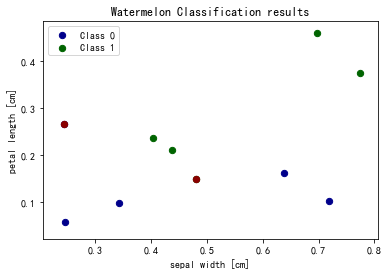

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

dataLoad = pd.read_csv('data/watermelon30a.txt', header=None)
x,y = dataLoad.values[:, :-1], dataLoad[2].tolist()
y = pd.Categorical(y).codes
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.45, random_state=123,
                                                    stratify=y)
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

classifier = KNeighborsClassifier()
classifier.fit(train_x, train_y)
pred_y = classifier.predict(test_x)

print("Fraction Correct [Accuracy]:")
accuracy = np.sum(pred_y == test_y) / float(len(test_y))
print(accuracy)

print("Samples correctly classified:")
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print("Samples incorrectly classified:")
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)
colors = ["darkblue","darkgreen"]
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_x[idx, 0],test_x[idx, 1],c=color, s =40, label="Class %s" % n)

plt.scatter(test_x[incorrect_idx, 0],test_x[incorrect_idx,1],c='darkred', s =40)
plt.xlabel("sepal width [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.title("Watermelon Classification results")
plt.show()

#2 鸢尾花的KNN算法

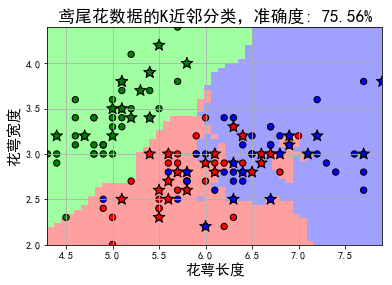

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib as mpl

# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

data = pd.read_csv('data/iris.data', header=None)
x = data[np.arange(4)]
y = pd.Categorical(data[4]).codes
x = x.iloc[:, :2]# 为了可视化，仅使用前两列特征
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)


classifier = KNeighborsClassifier()


classifier.fit(x_train, y_train)
y_test_hat = classifier.predict(x_test)

N, M = 50,50 # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

y_show_hat = classifier.predict(x_show)  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[0], x_test[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=cm_dark, marker='*')  # 测试数据
plt.scatter(x[0], x[1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
y_test = y_test.reshape(-1)
result = (y_test_hat == y_test)   # True则预测正确，False则预测错误
acc = np.mean(result)
plt.title(u'鸢尾花数据的K近邻分类，准确度: %.2f%%' % (100 * acc), fontsize=17)
plt.show()